In [21]:
import explore as e
import outliers as o
import wrangle as w
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions as f

## 2.  Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

### Acquire and Prep

In [22]:
df = w.get_log_data()

In [23]:
df = w.prep_log_data()

### Take 28 cohort out as they are Staff and remove cohort null values

In [24]:
df = df[df.cohort_id != 28.0]
df = df[df.cohort_id.notnull()]
df.tail(60)

time                                         path  user_id  \
date                                                                         
2021-04-21  15:52:38             spring/fundamentals/repositories      890   
2021-04-21  15:52:45                                        mysql      890   
2021-04-21  15:53:08                                      java-ii      890   
2021-04-21  15:53:08                                       java-i      890   
2021-04-21  15:53:35              javascript-ii/map-filter-reduce      869   
2021-04-21  15:57:13                                       java-i      890   
2021-04-21  15:57:14                  java-i/introduction-to-java      890   
2021-04-21  15:58:53                                java-iii/jdbc      826   
2021-04-21  15:59:50          javascript-i/bom-and-dom/dom-events      876   
2021-04-21  16:01:11                                            /      841   
2021-04-21  16:01:24                       classification/project      841   
2021-04-21  16:04:04                                        mysql      821   
2021-04-21  16:04:04                                        mysql      821   
2021-04-21  16:04:07                       mysql/basic-statements      821   
2021-04-21  16:09:55                 javascript-i/bom-and-dom/bom      875   
2021-04-21  16:10:10                 javascript-i/bom-and-dom/dom      875   
2021-04-21  16:10:41                                       java-i      866   
2021-04-21  16:10:50                                     html-css      925   
2021-04-21  16:10:52        html-css/css-ii/bootstrap-grid-system      925   
2021-04-21  16:12:05                                       jquery      869   
2021-04-21  16:12:08                  java-i/introduction-to-java      866   
2021-04-21  16:12:10                             jquery/selectors      869   
2021-04-21  16:12:45                                jquery/events      869   
2021-04-21  16:12:46                                     java-iii      825   
2021-04-21  16:12:47                          java-iii/user-input      825   
2021-04-21  16:12:48                   jquery/events/mouse-events      869   
2021-04-21  16:12:55                jquery/events/keyboard-events      869   
2021-04-21  16:14:16                           regression/project      841   
2021-04-21  16:15:51                           regression/project      841   
2021-04-21  16:17:08                            java-iii/servlets      834   
2021-04-21  16:18:03                                          toc      937   
2021-04-21  16:18:06       html-css/css-ii/bootstrap-introduction      937   
2021-04-21  16:18:09        html-css/css-ii/bootstrap-grid-system      937   
2021-04-21  16:20:26        html-css/css-ii/bootstrap-grid-system      922   
2021-04-21  16:20:47        html-css/css-ii/bootstrap-grid-system      925   
2021-04-21  16:23:53                                            /      143   
2021-04-21  16:23:57                           clustering/project      841   
2021-04-21  16:30:30                                     appendix      771   
2021-04-21  16:30:45  jquery/essential-methods/attributes-and-css      869   
2021-04-21  16:31:18          jquery/essential-methods/traversing      869   
2021-04-21  16:31:29                                  jquery/ajax      869   
2021-04-21  16:31:31           jquery/ajax/requests-and-responses      869   
2021-04-21  16:32:13                            jquery/mapbox-api      869   
2021-04-21  16:32:28                      jquery/ajax/weather-map      869   
2021-04-21  16:32:33                                     html-css      793   
2021-04-21  16:32:35            java-i/syntax-types-and-variables      866   
2021-04-21  16:32:36                  html-css/css-i/introduction      793   
2021-04-21  16:32:50                           clustering/project      841   
2021-04-21  16:33:16                 javascript-i/bom-and-dom/dom      876   
2021-04-21  16:33:25          javascri

In [25]:
cohort13 = df[df.cohort_id == 13.0]
cohort13

time                                               path  \
date                                                                      
2018-01-26  21:42:26                                                  /   
2018-01-27  02:12:02                                                  /   
2018-01-27  07:27:52            content/mysql/intro-to-mysql/users.html   
2018-01-27  07:28:04                                   content/html-css   
2018-01-27  07:28:09                     content/html-css/elements.html   
...              ...                                                ...   
2021-04-03  20:41:36  content/javascript/introduction-to-javascript....   
2021-04-03  20:52:31            content/javascript/primitive-types.html   
2021-04-05  21:27:52       content/javascript/javascript-with-html.html   
2021-04-10  00:20:55               content/javascript/conditionals.html   
2021-04-10  00:21:15                      content/javascript/loops.html   

            user_id  cohort_id              ip  id   name   slack start_date  \
date                                                                           
2018-01-26       50         13   24.26.254.147  13  Kings  #kings 2016-05-23   
2018-01-27       50         13   24.26.254.147  13  Kings  #kings 2016-05-23   
2018-01-27       51         13   72.179.161.39  13  Kings  #kings 2016-05-23   
2018-01-27       51         13   72.179.161.39  13  Kings  #kings 2016-05-23   
2018-01-27       51         13   72.179.161.39  13  Kings  #kings 2016-05-23   
...             ...        ...             ...  ..    ...     ...        ...   
2021-04-03       51         13  72.179.168.148  13  Kings  #kings 2016-05-23   
2021-04-03       51         13  72.179.168.148  13  Kings  #kings 2016-05-23   
2021-04-05       51         13  72.179.168.148  13  Kings  #kings 2016-05-23   
2021-04-10       51         13  72.179.168.148  13  Kings  #kings 2016-05-23   
2021-04-10       51         13  72.179.168.148  13  Kings  #kings 2016-05-23   

             end_date          created_at          updated_at  program_id  
date                                                                       
2018-01-26 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
2018-01-27 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
2018-01-27 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
2018-01-27 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
2018-01-27 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
...               ...                 ...                 ...         ...  
2021-04-03 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
2021-04-03 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
2021-04-05 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
2021-04-10 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  
2021-04-10 2016-09-15 2016-06-14 19:52:26 2016-06-14 19:52:26           1  

[2845 rows x 13 columns]

### I am grouping by cohort_id and path, counting the amount of hits by cohort for each path

In [26]:
df_combined = df.groupby(['cohort_id', 'path'], as_index=False).size()
df_combined

cohort_id                                         path  size
0              1                                            /   626
1              1                  0_Classification_Algorithms     1
2              1                              2.0_Intro_Stats     1
3              1                         5.0_Intro_Regression     2
4              1                         7.0_Intro_Clustering     2
...          ...                                          ...   ...
12156        139                                       jquery     4
12157        139  jquery/essential-methods/attributes-and-css     1
12158        139                     search/search_index.json     9
12159        139                                       spring     2
12160        139                                          toc   101

[12161 rows x 3 columns]

### This function loops through each path and does the following:
* Masks the combined dataframe for the path
* Calculates the mean, max, standard deviation and upper/lower bounds of how many times the cohorts visited this page
* Finds outliers at the 3 standard deviation level
* Further limits the list to catch only one outlier (representing one single cohort going to the page while all others don't visit that much)
* prints out the scatterplot of cohort_id and visits for each page
* Returns list of paths to be zipped with the cohort list below

10835    132
Name: cohort_id, dtype: int64
appendix/code-standards,30,6.962962962962963


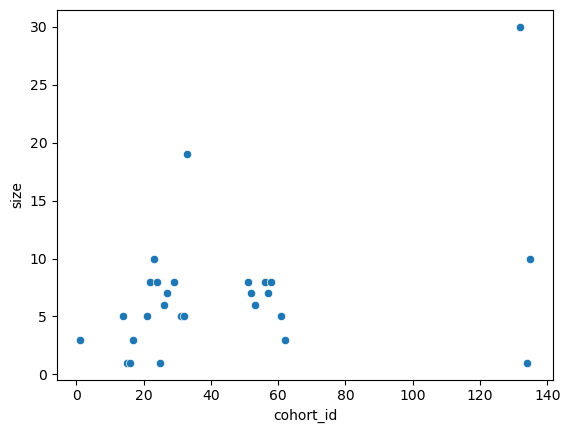

6966    33
Name: cohort_id, dtype: int64
appendix/code-standards/html-css,39,9.703703703703704


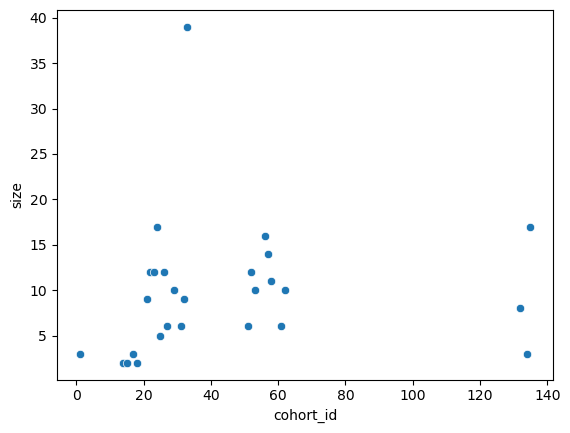

11575    135
Name: cohort_id, dtype: int64
appendix/code-standards/javascript,43,12.931034482758621


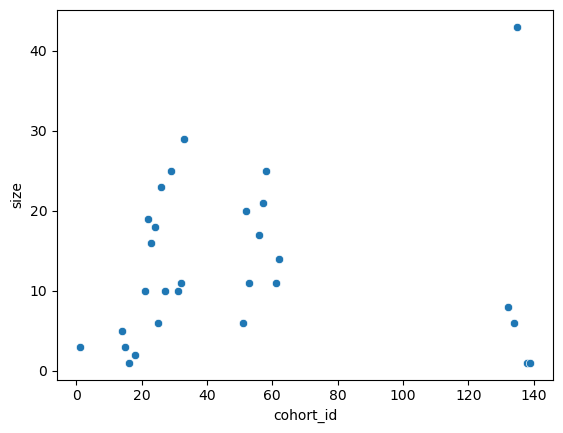

10278    61
Name: cohort_id, dtype: int64
appendix/extra-challenges/basic-challenges,92,20.8


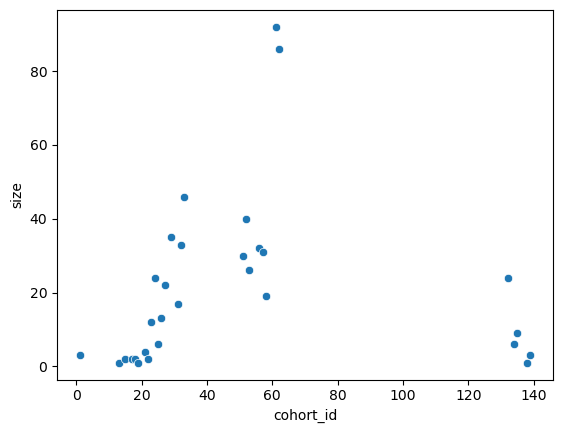

10288    61
Name: cohort_id, dtype: int64
appendix/extra-challenges/sales-tax,29,5.956521739130435


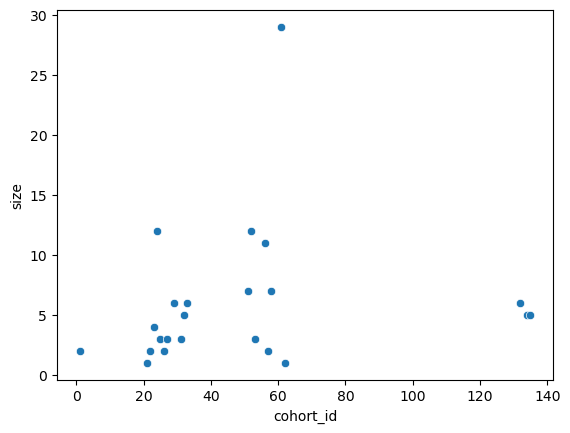

6289    31
Name: cohort_id, dtype: int64
appendix/further-reading/spring/pagination,54,12.76923076923077


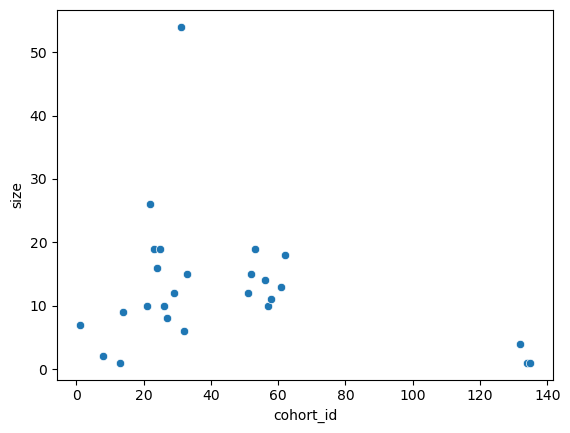

3686    22
Name: cohort_id, dtype: int64
appendix/git/merge-conflict-demo,30,7.032258064516129


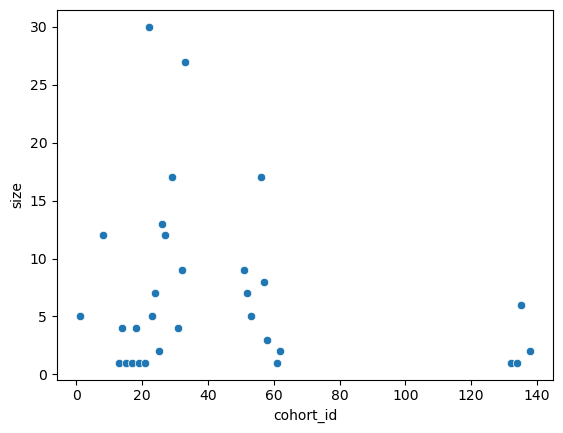

1200    13
Name: cohort_id, dtype: int64
content/laravel/intro,83,12.368421052631579


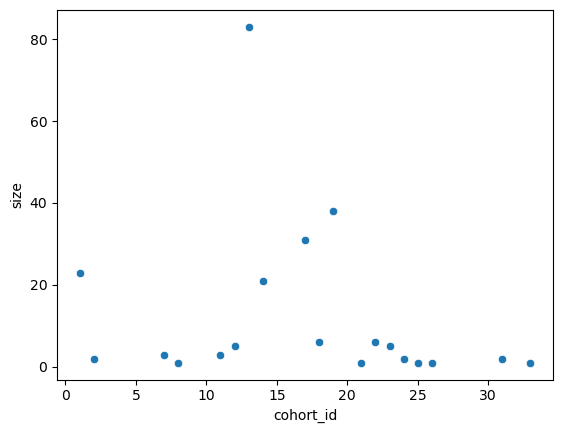

1201    13
Name: cohort_id, dtype: int64
content/laravel/intro/application-structure.html,63,10.923076923076923


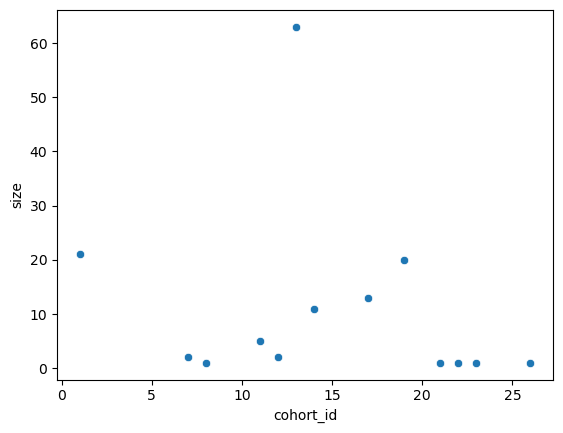

1203    13
Name: cohort_id, dtype: int64
content/laravel/intro/gitbook/images/favicon.ico,56,7.235294117647059


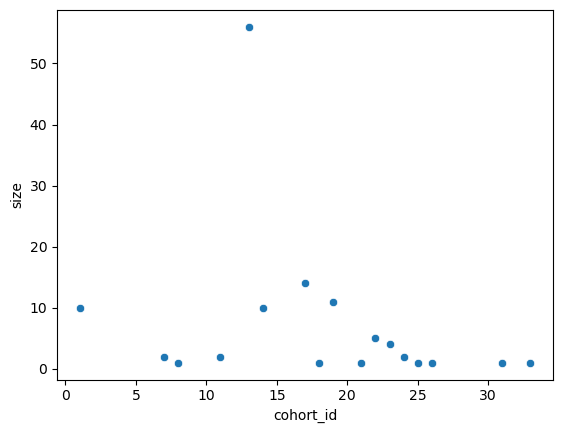

2435    17
Name: cohort_id, dtype: int64
content/php_ii,51,9.0


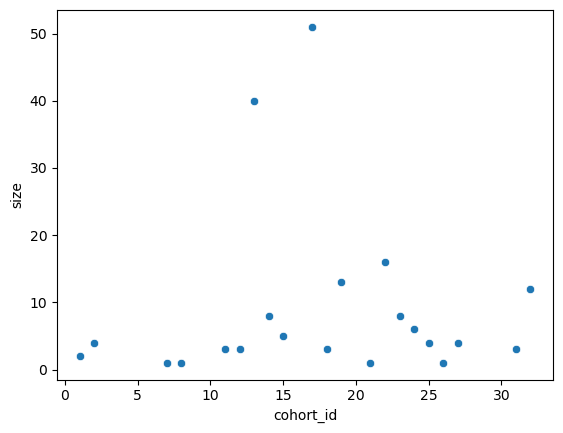

1314    13
Name: cohort_id, dtype: int64
content/php_iii,47,7.857142857142857


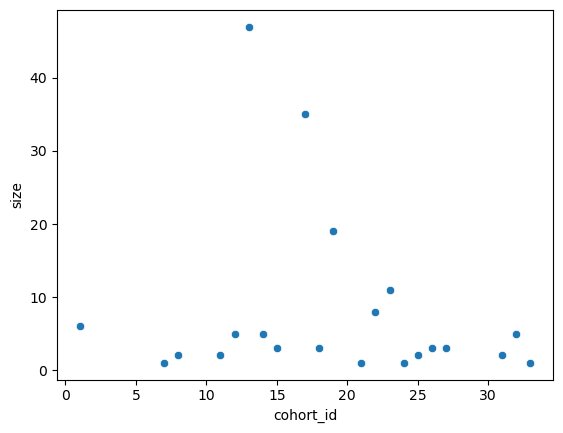

1315    13
Name: cohort_id, dtype: int64
content/php_iii/classes-and-objects-i,18,3.3846153846153846


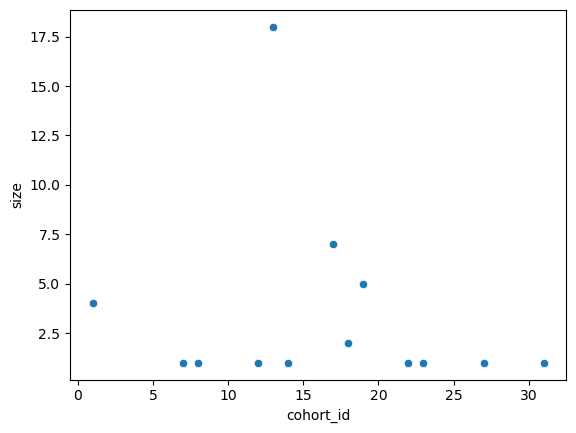

1320    13
Name: cohort_id, dtype: int64
content/php_iii/gitbook/images/favicon.ico,23,3.8


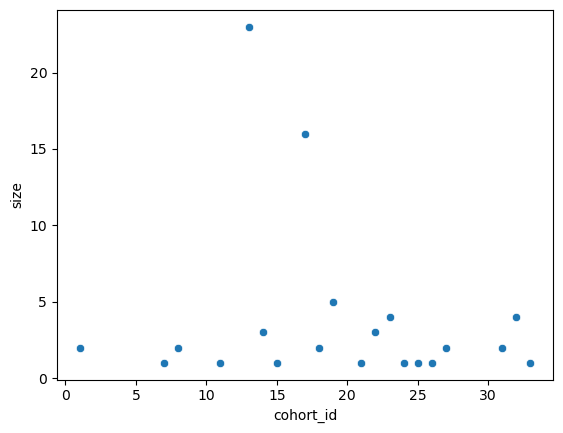

1330    13
Name: cohort_id, dtype: int64
content/php_iv,42,7.8125


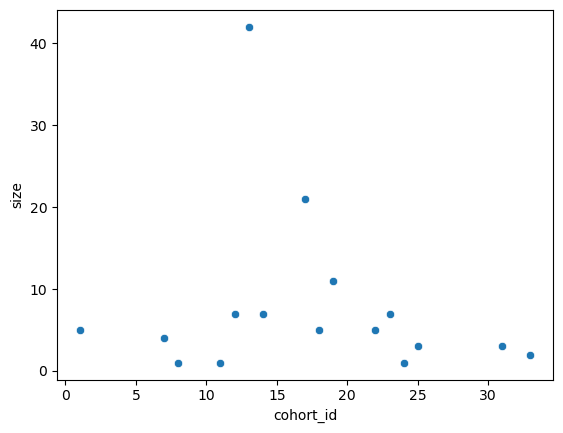

1346    13
Name: cohort_id, dtype: int64
content/php_iv/gitbook/images/favicon.ico,26,4.133333333333334


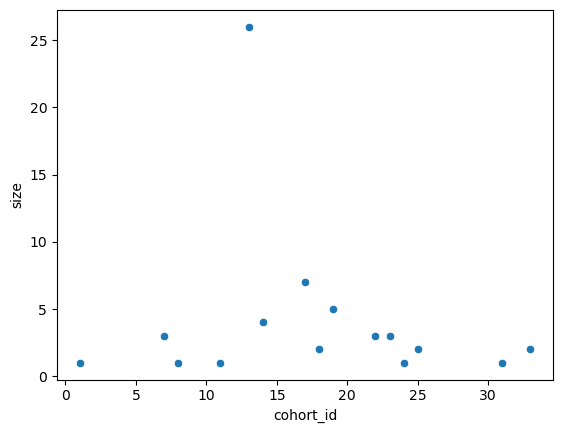

1347    13
Name: cohort_id, dtype: int64
content/php_iv/php-with-mysql,18,4.0


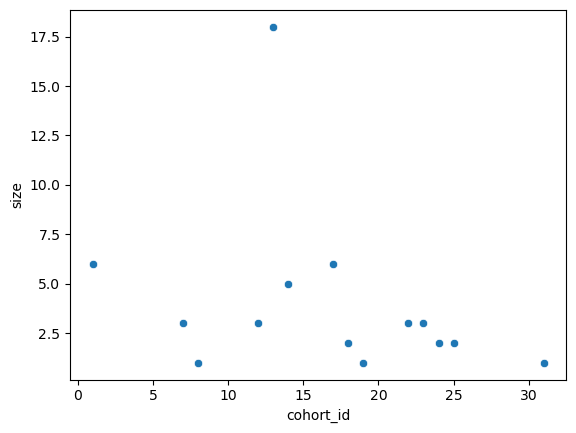

1348    13
Name: cohort_id, dtype: int64
content/php_iv/php-with-mysql/connect-to-db.html,9,2.5384615384615383


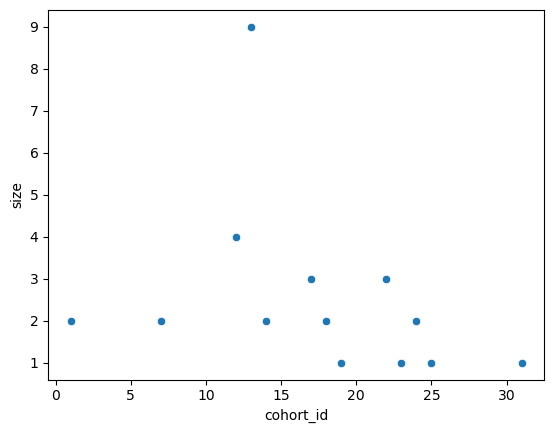

1351    13
Name: cohort_id, dtype: int64
content/php_iv/php-with-mysql/gitbook/images/favicon.ico,16,2.8333333333333335


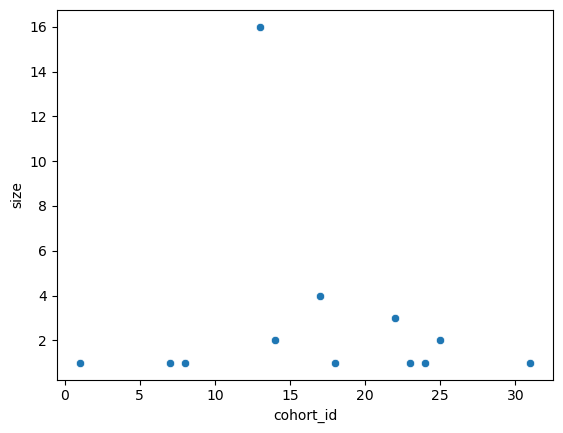

6426    31
Name: cohort_id, dtype: int64
html-css/css-i/flexbox,20,4.3125


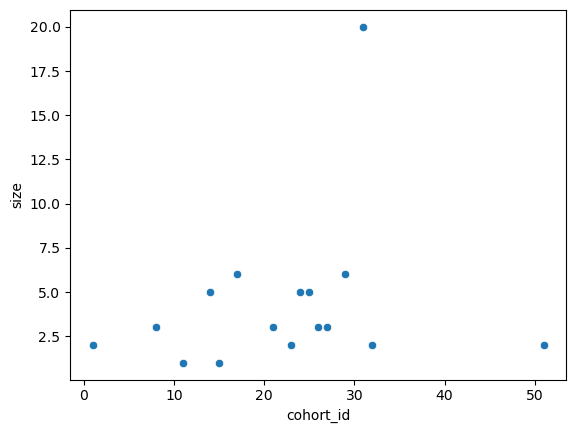

7079    33
Name: cohort_id, dtype: int64
html-css/css-i/introduction,370,111.48387096774194


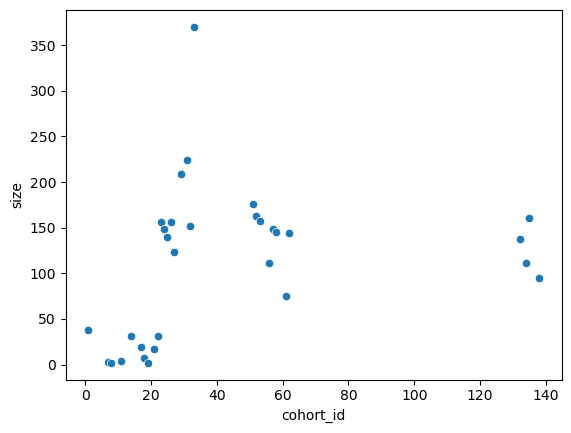

1749    14
Name: cohort_id, dtype: int64
index.html,877,79.57142857142857


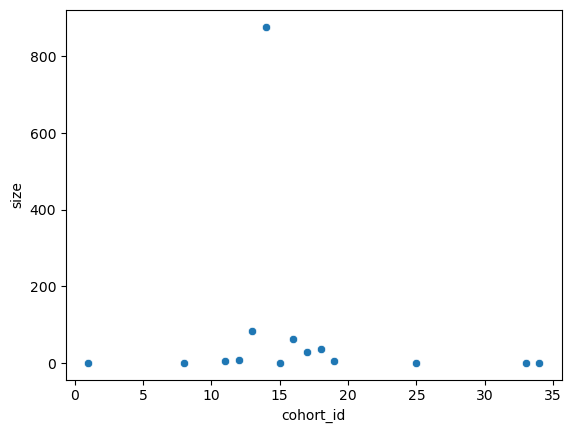

7971    51
Name: cohort_id, dtype: int64
jquery/whack-a-mole/create-game,37,11.571428571428571


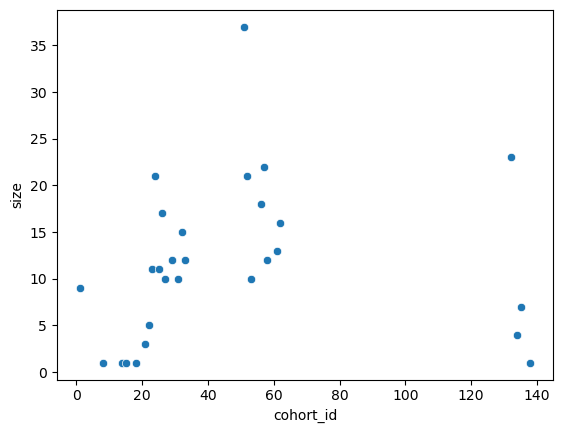

4048    22
Name: cohort_id, dtype: int64
mysql/extra-exercises,44,11.090909090909092


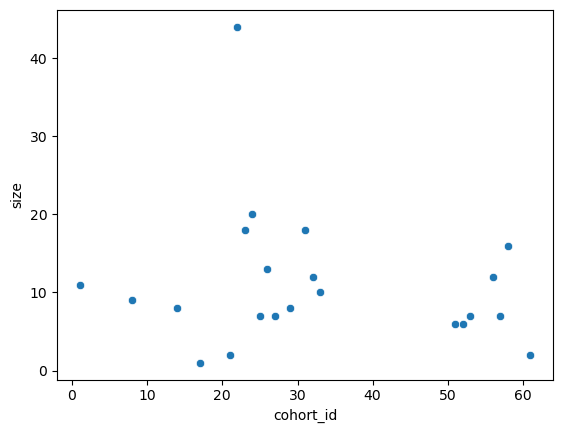

4850    24
Name: cohort_id, dtype: int64
prework/cli,28,5.535714285714286


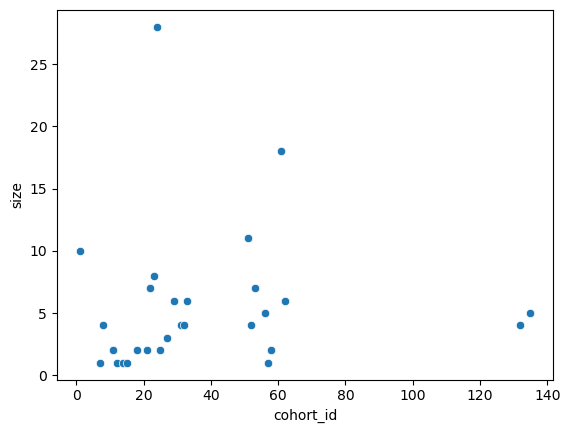

4851    24
Name: cohort_id, dtype: int64
prework/cli/01-intro,21,5.464285714285714


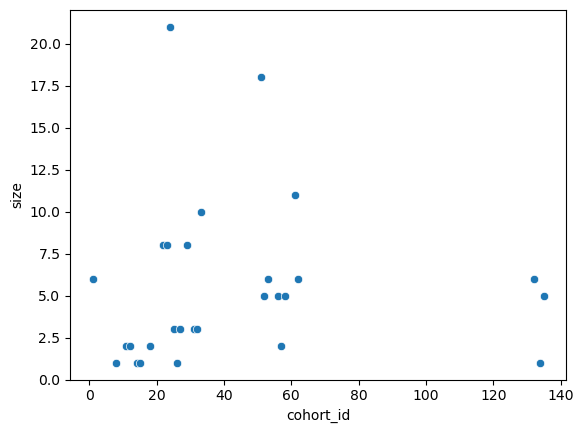

4852    24
Name: cohort_id, dtype: int64
prework/cli/02-listing-files,22,4.703703703703703


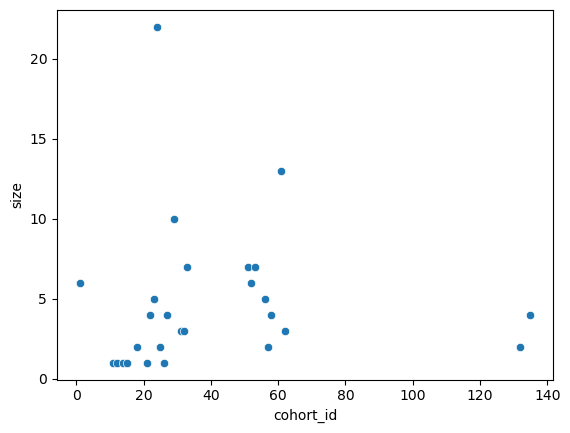

9224    56
Name: cohort_id, dtype: int64
prework/cli/03-file-paths,28,4.8


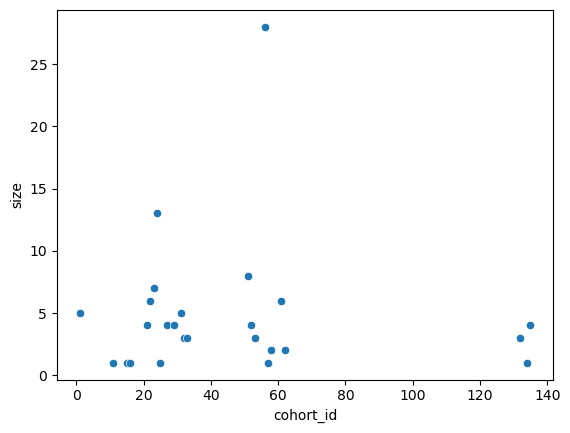

4074    22
Name: cohort_id, dtype: int64
slides/collections,108,16.142857142857142


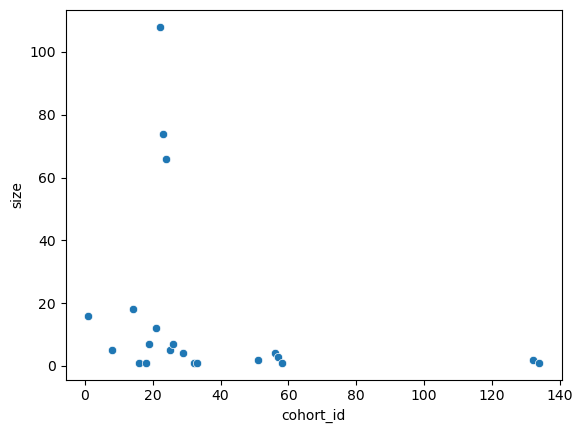

4077    22
Name: cohort_id, dtype: int64
slides/deployment_and_dependencies,94,13.380952380952381


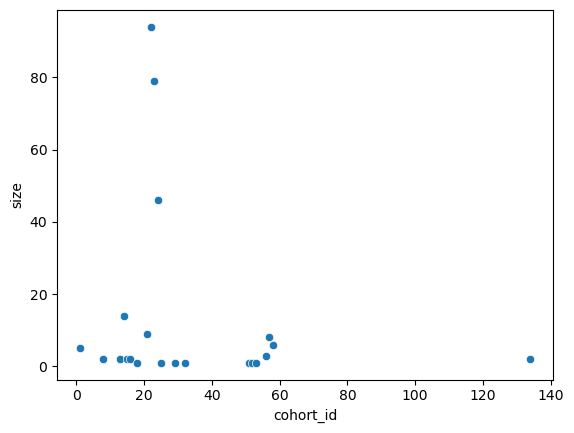

4086    22
Name: cohort_id, dtype: int64
slides/mvc,96,16.22222222222222


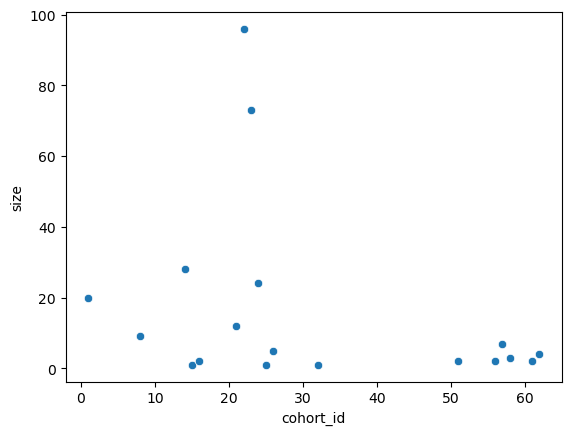

4873    24
Name: cohort_id, dtype: int64
slides/object_oriented_programming,116,18.115384615384617


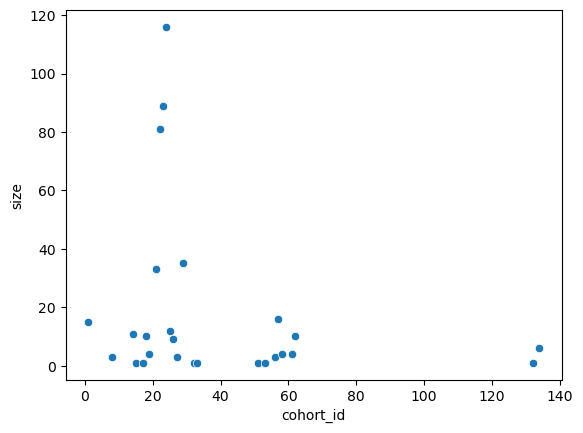

4877    24
Name: cohort_id, dtype: int64
slides/strings,77,11.565217391304348


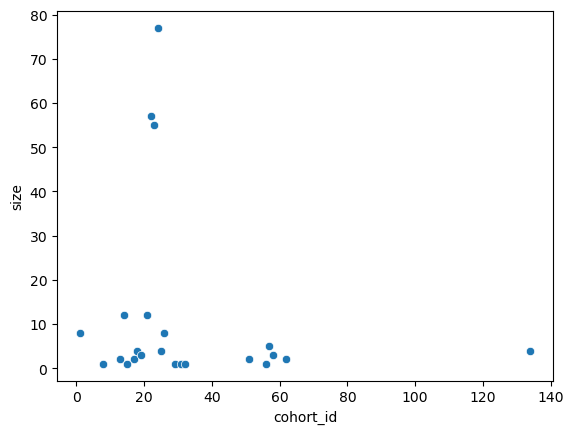

6726    32
Name: cohort_id, dtype: int64
content/php_i/types-and-variables-ii/intro-to-strings-continued.html,19,4.0


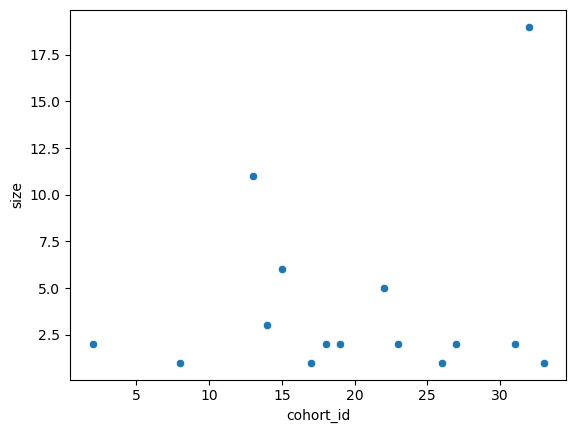

11671    135
Name: cohort_id, dtype: int64
introduction,11,2.9375


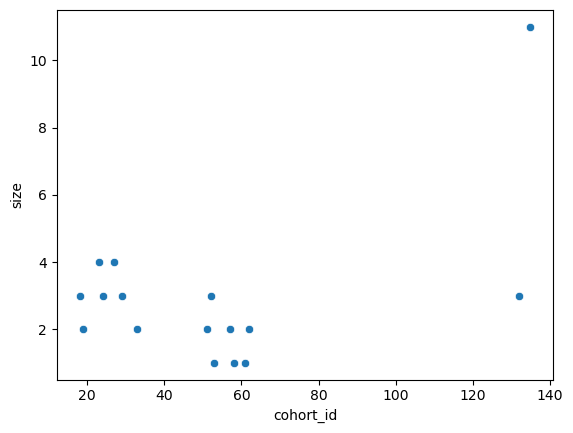

10548    62
Name: cohort_id, dtype: int64
appendix/coding-challenges/amateur,78,9.4


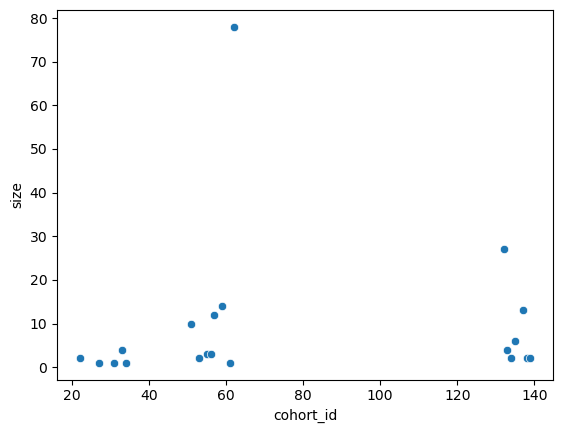

9342    57
Name: cohort_id, dtype: int64
appendix/professional-development/vertical-resume,66,11.5


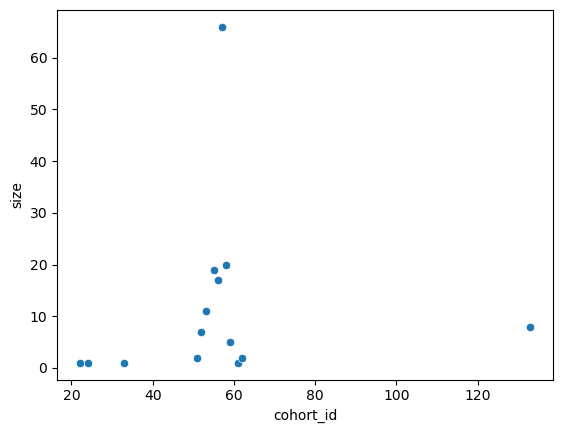

In [27]:
list_of_paths = f.find_outliers(df_combined)   

In [28]:
content/laravel/intro,83,12.368421052631579content/laravel/intro/application-structure.htmlcontent/laravel/intro/gitbook/images/favicon.ico,56,7.2352941176

SyntaxError: invalid decimal literal (3224778921.py, line 1)

In [29]:
list_of_cohorts = [132,33,135,61,61,31,22,13,13,13,17,13,13,13,13,13,13,13,13,31,33,14,51,22,24,24,24,56,22,22,22,24,24,32,135,62,57]

In [30]:
cohort_website = zip(list_of_cohorts, list_of_paths)
zipped_list = pd.DataFrame(list(cohort_website)).rename(columns={0:'Cohort Id', 1:'Website'})

In [31]:
zipped_list

Cohort Id                                            Website
0         132                            appendix/code-standards
1          33                   appendix/code-standards/html-css
2         135                 appendix/code-standards/javascript
3          61         appendix/extra-challenges/basic-challenges
4          61                appendix/extra-challenges/sales-tax
5          31         appendix/further-reading/spring/pagination
6          22                   appendix/git/merge-conflict-demo
7          13                              content/laravel/intro
8          13   content/laravel/intro/application-structure.html
9          13   content/laravel/intro/gitbook/images/favicon.ico
10         17                                     content/php_ii
11         13                                    content/php_iii
12         13              content/php_iii/classes-and-objects-i
13         13         content/php_iii/gitbook/images/favicon.ico
14         13                                     content/php_iv
15         13          content/php_iv/gitbook/images/favicon.ico
16         13                      content/php_iv/php-with-mysql
17         13   content/php_iv/php-with-mysql/connect-to-db.html
18         13  content/php_iv/php-with-mysql/gitbook/images/f...
19         31                             html-css/css-i/flexbox
20         33                        html-css/css-i/introduction
21         14                                         index.html
22         51                    jquery/whack-a-mole/create-game
23         22                              mysql/extra-exercises
24         24                                        prework/cli
25         24                               prework/cli/01-intro
26         24                       prework/cli/02-listing-files
27         56                          prework/cli/03-file-paths
28         22                                 slides/collections
29         22                 slides/deployment_and_dependencies
30         22                                         slides/mvc
31         24                 slides/object_oriented_programming
32         24                                     slides/strings
33         32  content/php_i/types-and-variables-ii/intro-to-...
34        135                                       introduction
35         62                 appendix/coding-challenges/amateur
36         57  appendix/professional-development/vertical-resume

### The most significant result comes from Cohort 13 content/laravel/intro/application-structure.html